In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from google.colab import files
uploaded = files.upload()
data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)
data_train_a.head()

Saving cpu-test-a.csv to cpu-test-a (1).csv
Saving cpu-train-a.csv to cpu-train-a (1).csv


<ipython-input-12-08a3be435d25>:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_train_a = pd.read_csv('cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True)
<ipython-input-12-08a3be435d25>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_test_a = pd.read_csv('cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True)


,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


Text(0.5, 1.0, 'CPU Utilization')

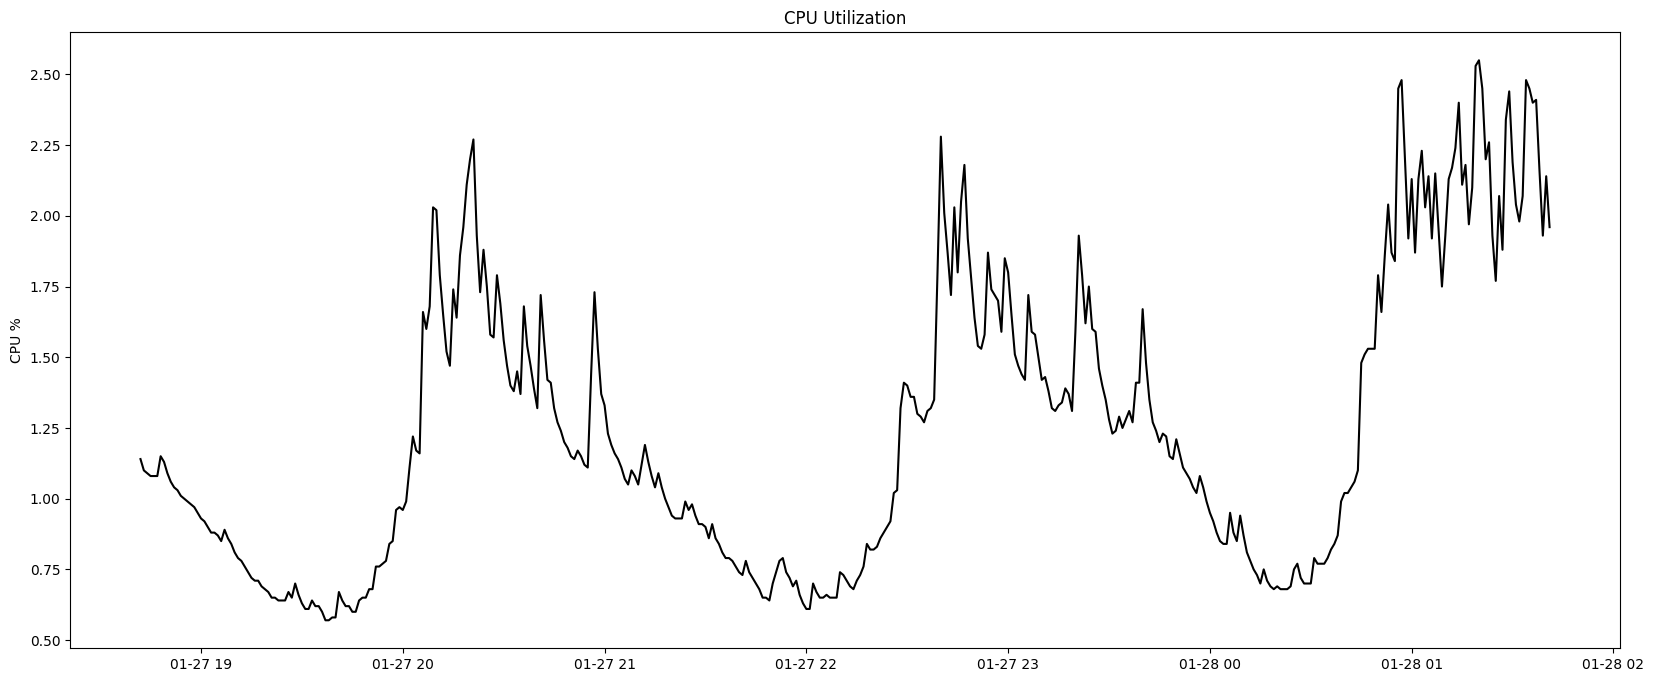

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [25]:

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train_a['cpu'], order=(11, 0, 11))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  420
Model:               ARIMA(11, 0, 11)   Log Likelihood                 297.937
Date:                Thu, 11 Apr 2024   AIC                           -547.874
Time:                        16:05:50   BIC                           -450.908
Sample:                             0   HQIC                          -509.548
                                - 420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2791      0.359      3.561      0.000       0.575       1.983
ar.L1          0.4120      0.899      0.458      0.647      -1.350       2.174
ar.L2          0.2344      0.804      0.291      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


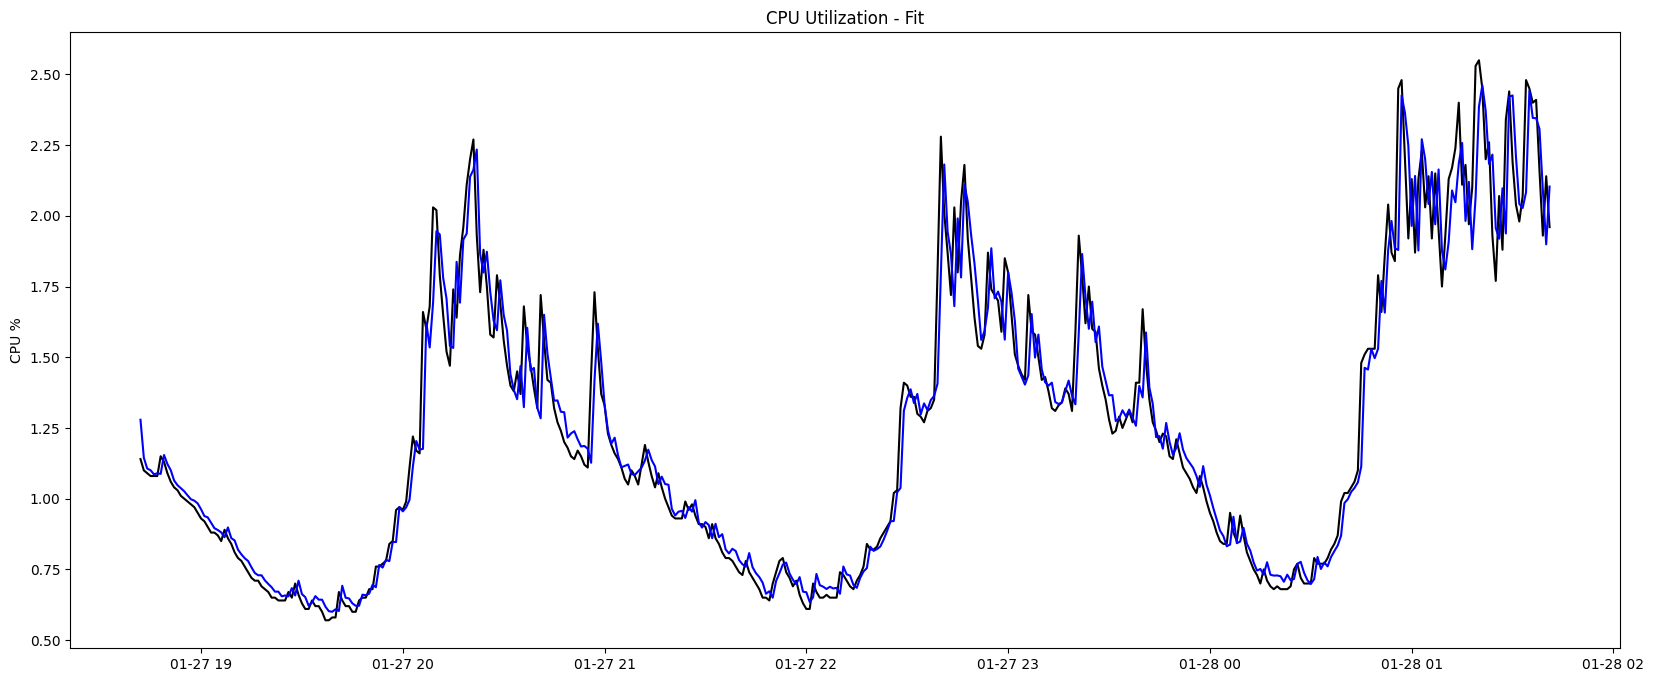

In [27]:
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.plot(data_train_a['datetime'], model_fit.fittedvalues, color='blue')
plt.ylabel('CPU %')
plt.title('CPU Utilization - Fit')
plt.show()


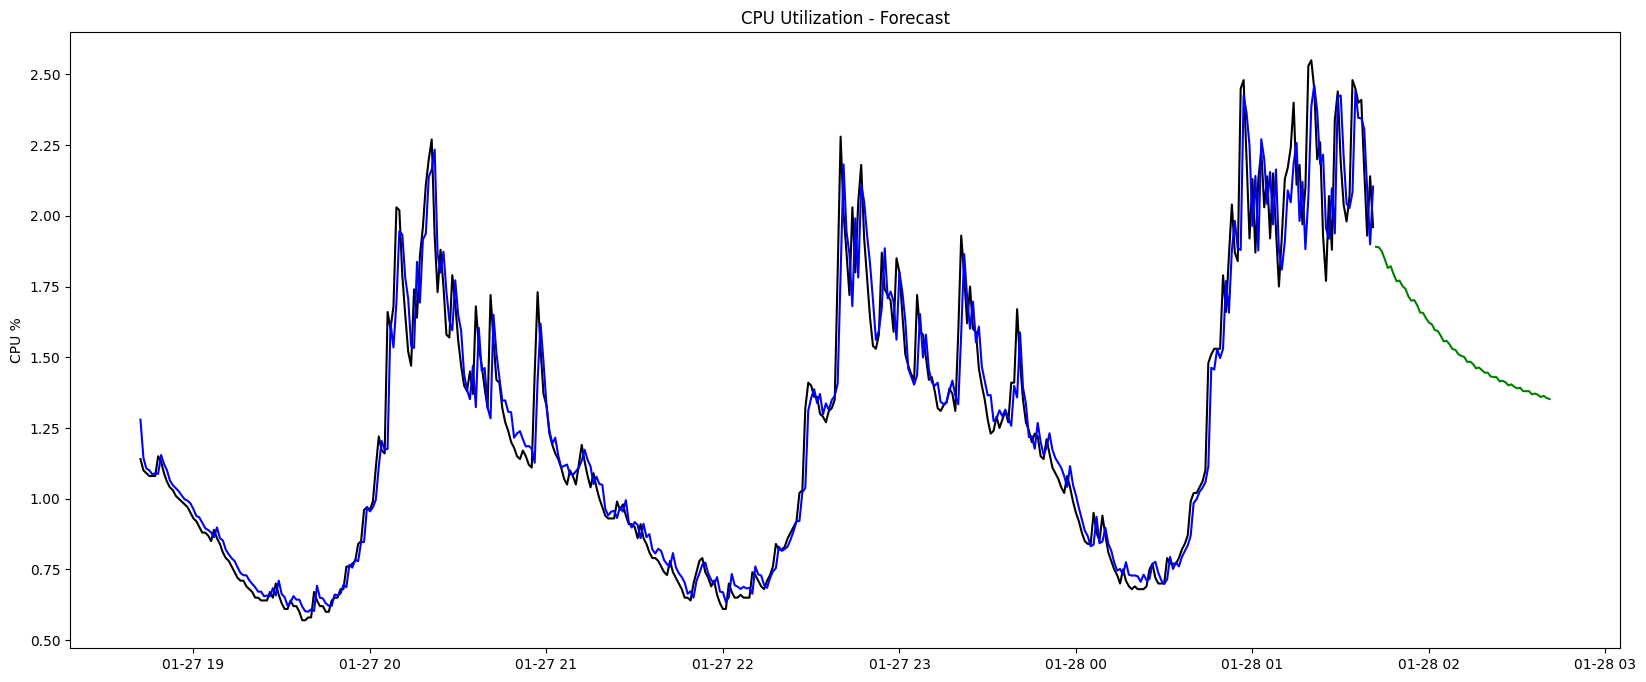

In [30]:
fcst = model_fit.forecast(len(data_test_a))

plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.plot(data_train_a['datetime'], model_fit.fittedvalues, color='blue')
plt.plot(data_test_a['datetime'], fcst, color='green')
plt.ylabel('CPU %')
plt.title('CPU Utilization - Forecast')
plt.show()


<ipython-input-33-5c8b492993c2>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_train_b = pd.read_csv('cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
<ipython-input-33-5c8b492993c2>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_test_b = pd.read_csv('cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)


Text(0.5, 1.0, 'CPU Utilization')

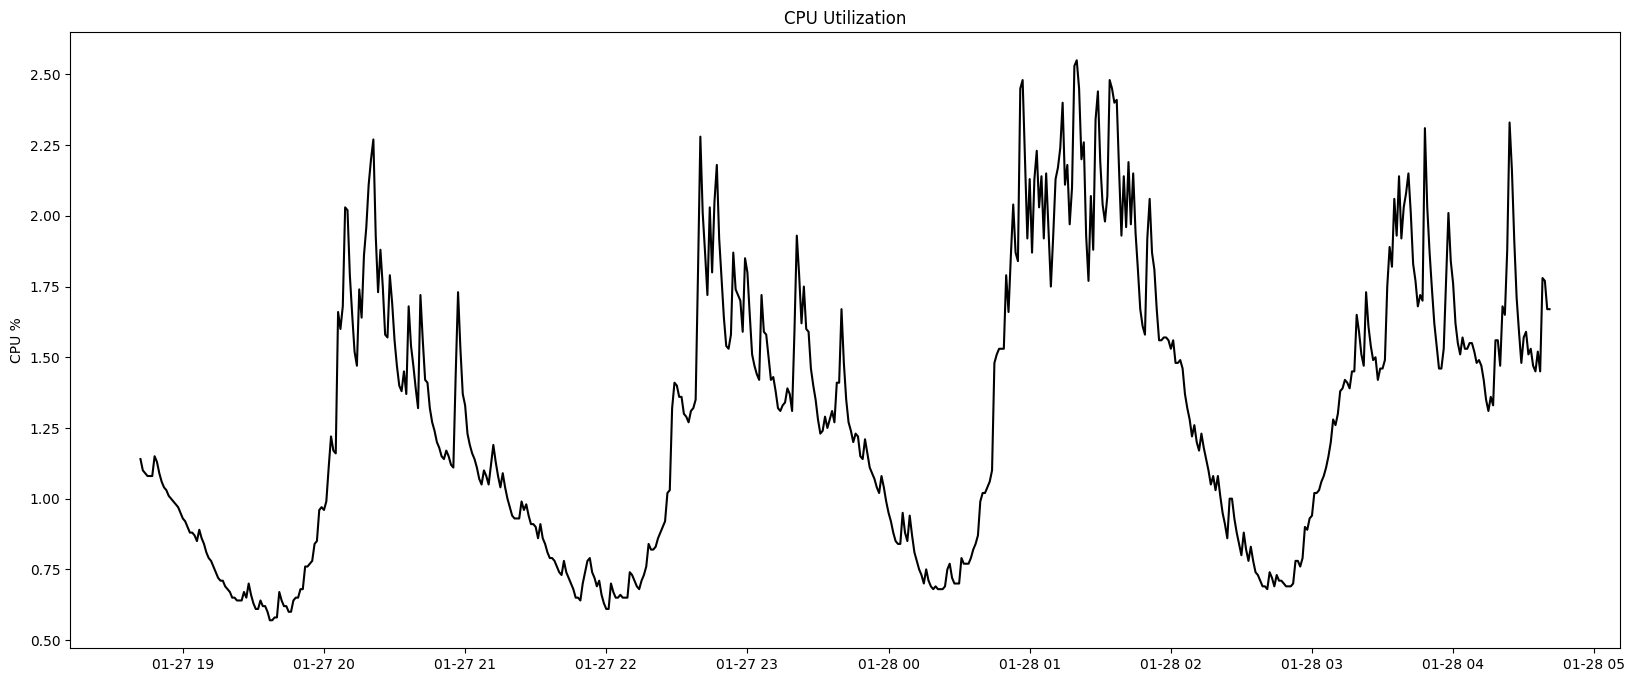

In [33]:
data_train_b = pd.read_csv('cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv('cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True)
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

In [34]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train_b['cpu'], order=(11, 0, 11))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    cpu   No. Observations:                  600
Model:               ARIMA(11, 0, 11)   Log Likelihood                 433.689
Date:                Thu, 11 Apr 2024   AIC                           -819.378
Time:                        16:12:53   BIC                           -713.852
Sample:                             0   HQIC                          -778.299
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2745      0.123     10.380      0.000       1.034       1.515
ar.L1          1.2169      0.497      2.450      0.014       0.243       2.190
ar.L2         -0.3419      0.953     -0.359      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


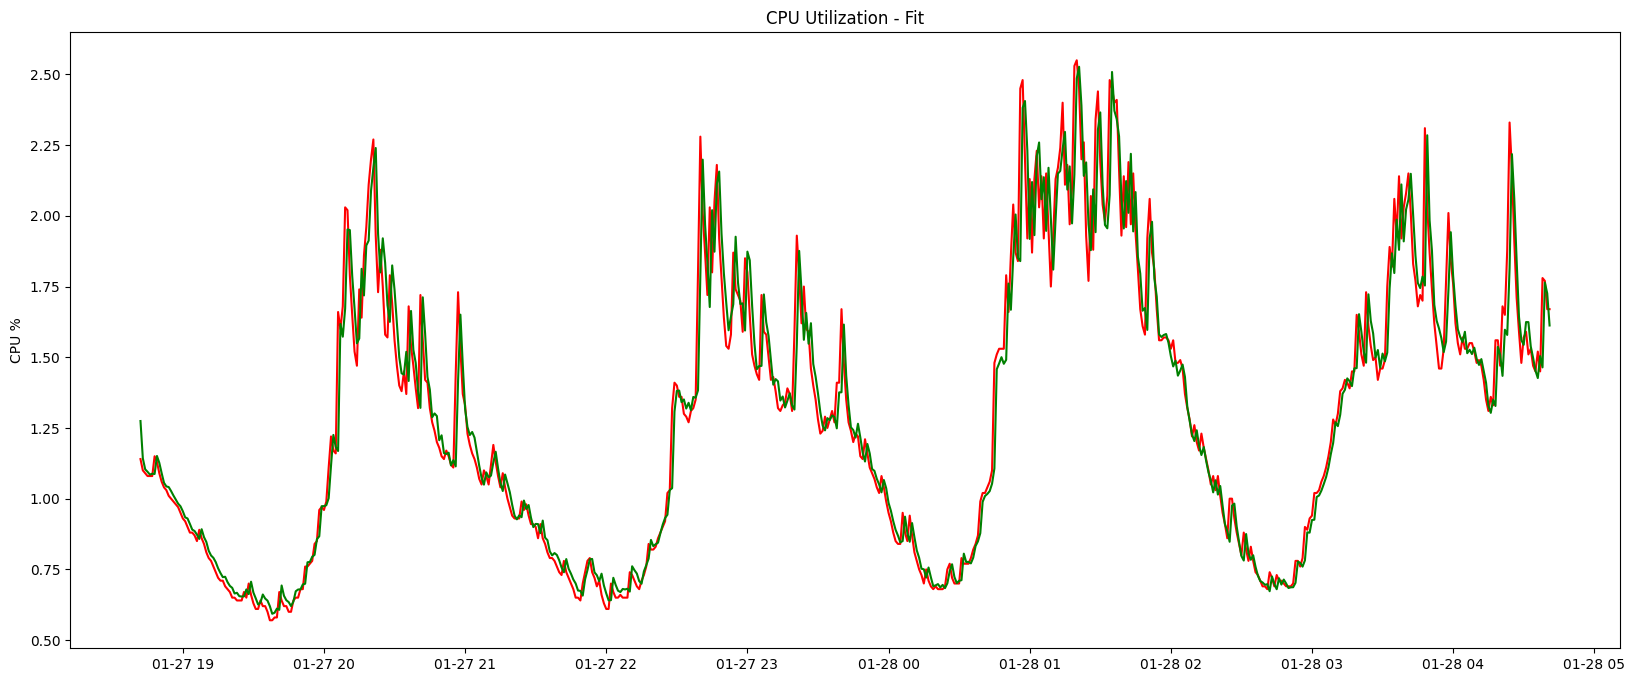

In [38]:

plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='red')
plt.plot(data_train_b['datetime'], model_fit.fittedvalues, color='green')
plt.ylabel('CPU %')
plt.title('CPU Utilization - Fit')
plt.show()


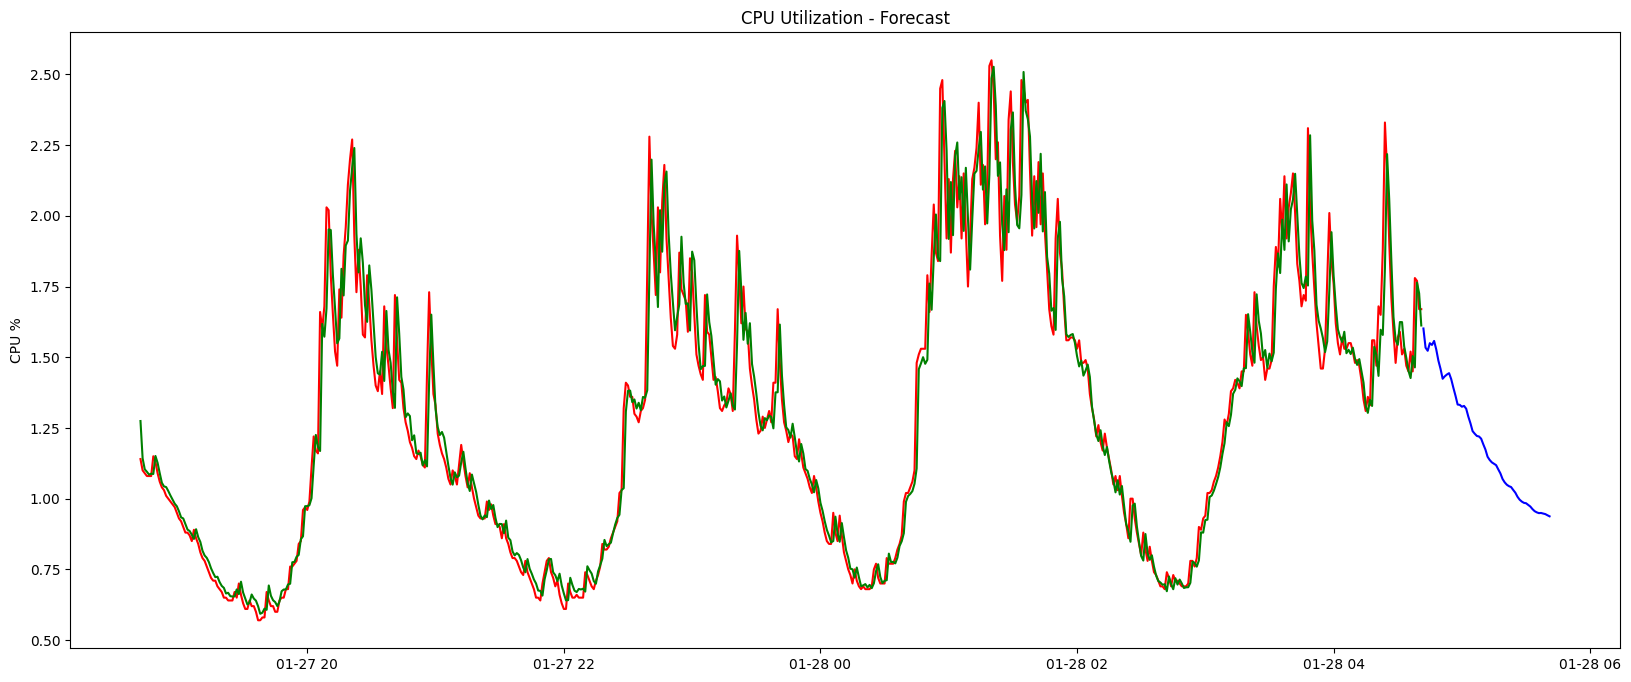

In [39]:
fcst = model_fit.forecast(len(data_test_b))
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='red')
plt.plot(data_train_b['datetime'], model_fit.fittedvalues, color='green')
plt.plot(data_test_b['datetime'], fcst, color='blue')
plt.ylabel('CPU %')
plt.title('CPU Utilization - Forecast')
plt.show()
